In [ ]:
# Kod dla wykresu z procentem odwołanych lotów w zależnosci od przewoźnika

In [1]:
import pandas as pd 
import numpy as np
from util.getData import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = getData(["UniqueCarrier", "Cancelled"])

In [3]:
df1 = df.dropna()
df2 = df1.query("Cancelled == 1")
df1["Flights"] = df1.groupby("UniqueCarrier")["UniqueCarrier"].transform('count')
df2["CancelledFlights"] = df2.groupby("UniqueCarrier")["UniqueCarrier"].transform('count')
df1 = df1[["UniqueCarrier", "Flights"]]
df2 = df2[["UniqueCarrier", "CancelledFlights"]]


In [4]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [5]:
df3 = df1.merge(df2, on="UniqueCarrier")

In [6]:
df3["CancellationRatio"] = (df3.CancelledFlights / df3.Flights) * 100

In [7]:
df3 = df3.sort_values("CancellationRatio", ascending=False).head(10)
df3 = df3[["UniqueCarrier", "CancellationRatio"]]

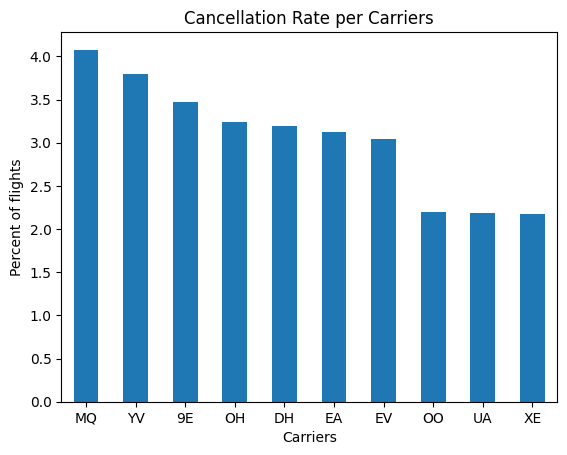

In [9]:
df3.plot(kind="bar", legend=None)
plt.title("Cancellation Rate per Carriers")
plt.xticks(np.arange(10), list(df3.UniqueCarrier), rotation=0)
plt.ylabel("Percent of flights")
plt.xlabel("Carriers")
plt.show()